# AutoML - Predict bike rentals

## Use Case
Predict bike rentals based on day of a week, season, and weather conditions.

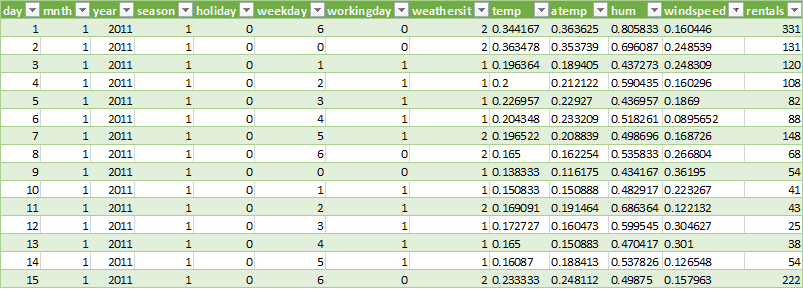

## Prerequisities
Before you start using **AutoML**, you must log in to **Azure Portal** and create new resource:
1. Log in to Azure Portal, choose **Create new resource**, search for **Machine Learning** and create this resource
2. After it is created, go to it and open it with **Launch studio** button
3. In **Microsoft Azure Machine Learning**, go to dataset tab, and upload dataset - dataset used in this example can be found here: https://aka.ms/bike-rentals; 
4. Choose which columns and rows do you need, then submit

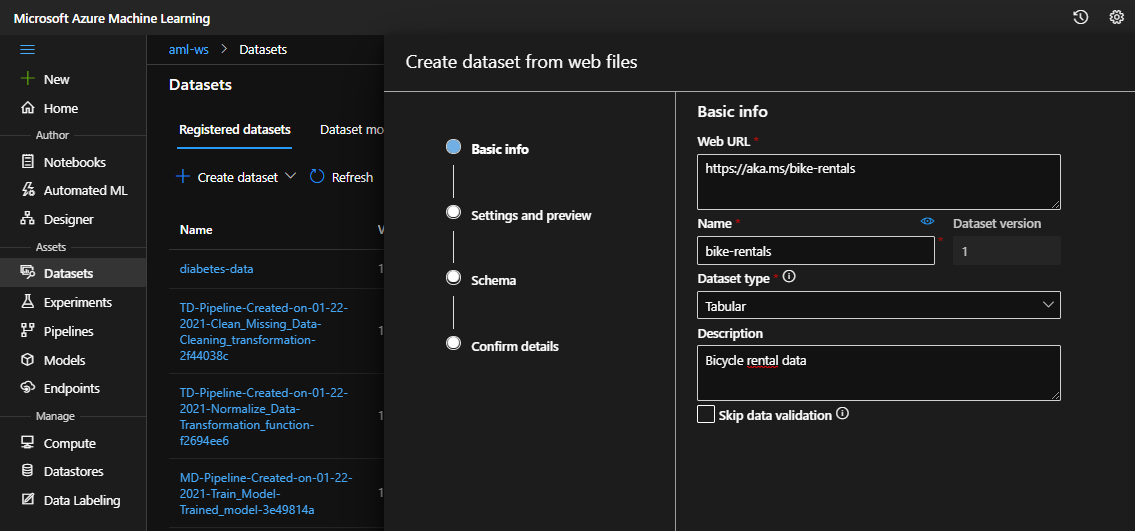

## Create Notebook and Compute instances
1. Go to **Notebooks** tab, choose **Create new file**, provide a name for your file and choose **Notebook** for a file type.
2. Next, go to **Compute** tab
3. In the **Compute instances** tab, click **Create** button, and choose parameters for your Compute instance
4. In the **Compute clusters** tab, click **Create** button, and choose parameters for your Compute cluster

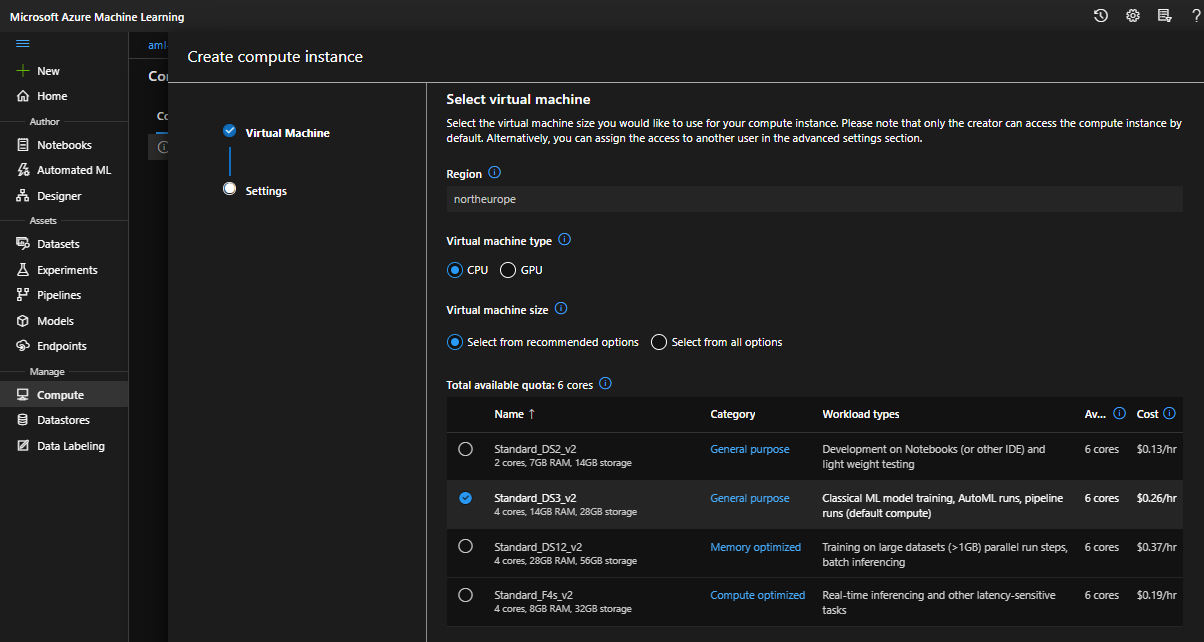

## Configure your workspace

In [2]:
from azureml.core import Workspace, Dataset

ws = Workspace.from_config()

## Load  uploaded data from Azure ML Datasets 

In [3]:
# Load Data
aml_dataset = ws.datasets['bike-rentals']

# Use Pandas DataFrame just to sneak peak some data and schema
full_df = aml_dataset.to_pandas_dataframe()
full_df.head(5)

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


## Investigate your dataset

In [4]:
# Use Pandas DataFrame just to investigate the dataset's schema and info
full_df.describe()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,15.738714,6.519836,2011.500684,2.496580,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,8.809949,3.451913,0.500342,1.110807,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,8.000000,4.000000,2011.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,16.000000,7.000000,2012.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,23.000000,10.000000,2012.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,31.000000,12.000000,2012.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


## Prepare dataset for training
Sometimes, dataset can contain too many informations, that are not necessary for training a model. In our dataset, we don't have any redundant columns(actually day, mnth and year columns could be removed, as the rentals count is more likely to be dependent on weather conditions and day of a week - working day or holiday, rather than on a year number, but we can leave it for now)

## Split original AML Tabular Dataset in two - test set and training set

In [6]:
train_dataset, test_dataset = aml_dataset.random_split(0.9, seed=1)

train_dataset_df = train_dataset.to_pandas_dataframe()
test_dataset_df = test_dataset.to_pandas_dataframe()

print(train_dataset_df.describe())

              day        mnth         year      season     holiday  \
count  654.000000  654.000000   654.000000  654.000000  654.000000   
mean    15.648318    6.490826  2011.496942    2.478593    0.032110   
std      8.768340    3.459113     0.500373    1.109061    0.176427   
min      1.000000    1.000000  2011.000000    1.000000    0.000000   
25%      8.000000    4.000000  2011.000000    1.250000    0.000000   
50%     16.000000    6.000000  2011.000000    2.000000    0.000000   
75%     23.000000   10.000000  2012.000000    3.000000    0.000000   
max     31.000000   12.000000  2012.000000    4.000000    1.000000   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  654.000000  654.000000  654.000000  654.000000  654.000000  654.000000   
mean     3.019878    0.681957    1.396024    0.493944    0.473046    0.626133   
std      2.006399    0.466073    0.542849    0.182959    0.162551    0.143480   
min      0.000000    0.000000    1.000000    

## Check remote AML compute targets available

In [7]:
from azureml.core.compute import AmlCompute
from azureml.core.compute import ComputeTarget

ComputeTarget.list(ws)

[{
   "id": "/subscriptions/f9e33e00-6872-499d-a887-cdc992cd36ab/resourceGroups/aml-rg/providers/Microsoft.MachineLearningServices/workspaces/aml-ws/computes/cpu-computer",
   "name": "cpu-computer",
   "location": "northeurope",
   "tags": null,
   "properties": {
     "description": null,
     "computeType": "ComputeInstance",
     "computeLocation": "northeurope",
     "resourceId": null,
     "provisioningErrors": null,
     "provisioningState": "Succeeded",
     "properties": {
       "vmSize": "STANDARD_DS3_V2",
       "applications": [
         {
           "displayName": "Jupyter",
           "endpointUri": "https://cpu-computer.northeurope.instances.azureml.ms"
         },
         {
           "displayName": "Jupyter Lab",
           "endpointUri": "https://cpu-computer.northeurope.instances.azureml.ms/lab"
         },
         {
           "displayName": "RStudio",
           "endpointUri": "https://cpu-computer-8787.northeurope.instances.azureml.ms"
         }
       ],
   

## Connect to Remote AML Compute (Existing AML cluster) or create new one

In [8]:
amlcompute_cluster_name = "cpu-clusters"

found = False
# Check if this compute target already exists in the workspace.
cts = ws.compute_targets

if amlcompute_cluster_name in cts and cts[amlcompute_cluster_name].type == 'AmlCompute':
     found = True
     print('Found existing training cluster.')
     # Get existing cluster
     # Method 1:
     aml_remote_compute = cts[amlcompute_cluster_name]
     # Method 2:
     # aml_remote_compute = ComputeTarget(ws, amlcompute_cluster_name)
    
if not found:
     print('Creating a new training cluster...')
     provisioning_config = AmlCompute.provisioning_configuration(vm_size = "STANDARD_D13_V2", # for GPU, use "STANDARD_NC12"
                                                                 #vm_priority = 'lowpriority', # optional
                                                                 max_nodes = 20)
     # Create the cluster.
     aml_remote_compute = ComputeTarget.create(ws, amlcompute_cluster_name, provisioning_config)
    
print('Checking cluster status...')
# Can poll for a minimum number of nodes and for a specific timeout.
# If no min_node_count is provided, it will use the scale settings for the cluster.
aml_remote_compute.wait_for_completion(show_output = True, min_node_count = 0, timeout_in_minutes = 20)
    


Found existing training cluster.
Checking cluster status...
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


## Get informations about available Compute 

In [9]:
aml_remote_compute.get_status().serialize()

{'currentNodeCount': 0,
 'targetNodeCount': 0,
 'nodeStateCounts': {'preparingNodeCount': 0,
  'runningNodeCount': 0,
  'idleNodeCount': 0,
  'unusableNodeCount': 0,
  'leavingNodeCount': 0,
  'preemptedNodeCount': 0},
 'allocationState': 'Steady',
 'allocationStateTransitionTime': '2021-01-24T00:17:31.353000+00:00',
 'errors': None,
 'creationTime': '2021-01-24T00:17:28.113739+00:00',
 'modifiedTime': '2021-01-24T00:17:43.969210+00:00',
 'provisioningState': 'Succeeded',
 'provisioningStateTransitionTime': None,
 'scaleSettings': {'minNodeCount': 0,
  'maxNodeCount': 2,
  'nodeIdleTimeBeforeScaleDown': 'PT300S'},
 'vmPriority': 'Dedicated',
 'vmSize': 'STANDARD_DS3_V2'}

## List and select primary metric to drive the AutoML regression problem

In [10]:
from azureml.train import automl

automl.utilities.get_primary_metrics('regression')

['normalized_mean_absolute_error',
 'r2_score',
 'spearman_correlation',
 'normalized_root_mean_squared_error']

## Configure AutoML Experiment settings

In [11]:
import logging
import os

from azureml.train.automl import AutoMLConfig

project_folder = './automl'
os.makedirs(project_folder, exist_ok=True)

automl_config = AutoMLConfig(compute_target=aml_remote_compute,
                             task='regression',
                             primary_metric='r2_score',
                             experiment_timeout_minutes=15,                            
                             training_data=train_dataset,
                             label_column_name="rentals",
                             n_cross_validations=5,                                                   
                             enable_early_stopping=True,
                             featurization='auto',
                             debug_log='automated_ml_errors.log',
                             verbosity=logging.INFO,
                             path=project_folder
                             )


## Run Experiment 

In [12]:
from azureml.core import Experiment
from datetime import datetime

now = datetime.now()
time_string = now.strftime("%m-%d-%Y-%H")
experiment_name = "classif-automl-remote-{0}".format(time_string)
print(experiment_name)

experiment = Experiment(workspace=ws, name=experiment_name)

import time
start_time = time.time()
            
run = experiment.submit(automl_config, show_output=True)

print('Manual run timing: --- %s seconds needed for running the whole Remote AutoML Experiment ---' % (time.time() - start_time))

classif-automl-remote-01-24-2021-00
Running on remote.
No run_configuration provided, running on cpu-clusters with default configuration
Running on remote compute: cpu-clusters
Parent Run ID: AutoML_f700604d-d3ec-4d33-89e3-ab412e06cbc9

Current status: FeaturesGeneration. Generating features for the dataset.
Current status: ModelSelection. Beginning model selection.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected in the training data.
              Learn more about missing value imputation: https://aka.ms/AutomatedMLFeaturization

****************************************************************************************************

TYPE:         High cardinality feature detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and no high cardinality features were detected.
      

### Measure Parent Run Time needed for the whole AutoML process 

In [15]:
import time
import datetime as dt

run_details = run.get_details()

end_time_utc_str = run_details['endTimeUtc'].split(".")[0]
start_time_utc_str = run_details['startTimeUtc'].split(".")[0]
timestamp_end = time.mktime(datetime.strptime(end_time_utc_str, "%Y-%m-%dT%H:%M:%S").timetuple())
timestamp_start = time.mktime(datetime.strptime(start_time_utc_str, "%Y-%m-%dT%H:%M:%S").timetuple())

parent_run_time = timestamp_end - timestamp_start
print('Run Timing: --- %s seconds needed for running the whole Remote AutoML Experiment ---' % (parent_run_time))

Run Timing: --- 1424.0 seconds needed for running the whole Remote AutoML Experiment ---


## Retrieve the 'Best Model' 

In [16]:
best_run, fitted_model = run.get_output()
print(best_run)
print(fitted_model)

Run(Experiment: classif-automl-remote-01-24-2021-00,
Id: AutoML_f700604d-d3ec-4d33-89e3-ab412e06cbc9_18,
Type: azureml.scriptrun,
Status: Completed)
RegressionPipeline(pipeline=Pipeline(memory=None,
                                     steps=[('datatransformer',
                                             DataTransformer(enable_dnn=None,
                                                             enable_feature_sweeping=None,
                                                             feature_sweeping_config=None,
                                                             feature_sweeping_timeout=None,
                                                             featurization_config=None,
                                                             force_text_dnn=None,
                                                             is_cross_validation=None,
                                                             is_onnx_compatible=None,
                                          

## Make Predictions

### Prepare testing set by removing values you want to predict

In [18]:
import pandas as pd

#Remove Label/y column
if 'rentals' in test_dataset_df.columns:
    y_test_df = test_dataset_df.pop('rentals')

x_test_df = test_dataset_df

### Make predictions

In [19]:
y_predictions = fitted_model.predict(x_test_df)

print('10 predictions: ')
print(y_predictions[:10])

10 predictions: 
[ 171.35306905 -120.24379716  107.06687987  406.29212522  601.6882281
  374.38744957  721.77858564 1200.74851107  559.3787453   463.72080466]


### Calculate the r2_score of a model with Test Dataset

In [23]:
from sklearn.metrics import r2_score

print('R2 Score:')
r2_score(y_test_df, y_predictions)

R2 Score:


0.9128429609729469

For R2 score, the closer to a value of 1, the better a model is; the value of 0.91 tells us, that our model is pretty accurate.